# GOOGLE PLAY STORE APP INSTALLMENT PREDICTION

### Background

Google play store is the hub to download all the apps on the device whether it is a laptop or mobile phone. App is Considered to be installed When we download from Google play store

### Queries to Answer

1. Identify the type of models which you will prefer to make for this project.
2. Check whether there are null values or not in the dataset. If null values are there then do the null value imputation.
3. Check the presence of outliers. Use Boxplot as well suitable mathematical method to detect, If outliers are there for particular features then decide whether you will treat them or not. If yes, do the treatment.
4. Check for multicollinearity. If it is there do the necessary treatment.
5. Do for successful model building, it requires scaling. If yes, how you encounter it. Explain
6. Prepare at-least 4 models for this problem statement.
7. Evaluate your models and select it based on different evaluation parameters, Write significance also.
8. Identify the features which you think are the most needed for good installments prediction.
9. Predict installments for at-least 10 data points.
10. Mention the business scope of this project

## DATA DICTIONARY

1. App: Name of the app there in the google play store.
2. Category: Name of category under which app falls.
3. Ratings: total number of ratings on a particular app.
4. Reviews: Total number of reviews on particular app.
5. Size: Size of the memory particular app is occupying.
6. Installments: Total number of installments on a particular app from Google play store.
7. Type: Whether a particular app on google play is free or not.
8. Price: If the app is paid then the price of that particular app.
9. Content rating: 
10. Genres: The type of content the particular app is having.
11. Last Updated: The date on which app is last updated.
12. Current version: The current version of app at present.
13. Android Version: Particular version of particular app on the android.

In [1]:
!pip install xgboost

In [2]:
# Importing Necessary Libraries for Exproratory Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

# Libraries for data preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Libraries for Model Building

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# Libraries for Evaluation Metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

# Libraries for Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

In [3]:
# Importing Dataset for Analysis and Prediction

gps = pd.read_csv("D:/04 Data Science - The Dream/Skillslash/Assignment/googleplaystore.csv")

gps abbrevtes to google play store data

In [4]:
# Overview of first 10 records of dataset

gps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [5]:
# Shape of dataset

gps.shape

(10841, 13)

There are total 10841 records and 13 attributes in our loaded dataset

In [6]:
# Checking general information of dataset

gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From above it is evident that out of 13 attributes, only one attributes datatype is "float". Remaining 12 attributes are "object" datatype 

However, all attributes may have to be changed to interger ot float datatype for model building. We shall make changes in the following steps below 

In [7]:
# Checking for null value percentage of the dataset

round((gps.isnull().sum()/gps.count())*100,2)

App                0.00
Category           0.00
Rating            15.74
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.07
Android Ver        0.03
dtype: float64

The attributes "Rating", "Type", "Content Rating", "Current Ver" & "Android Ver" has null values. However, only Rating attribue has comparitively high volume of null values which is around 16 %. Other attributes have minor volume of null values which is less than 0.5 %

In [8]:
# Checking basic statistical parameters

gps.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


As attribute "Rating" is float, basic statistical measures such as mean, median, standard deviation can be checked.

Further, as indicated in the above table mean and median are slightly different/left skewed and the values are not too far from each other. This can be due to the nature of the data or outliers which will be looked again in the follwing steps

### Data Cleaning & Assigning Datatype 

In [9]:
# Analysis of Reviews Column

print("Total Unique Values in Rewiews Column is:",gps["Reviews"].nunique())

def reviews_clean(reviews):
    if "M" in reviews:
        x = reviews[:-1]
        x = float(x) * 1000000
        return x
    elif "K" in reviews:
        y = reviews[:-1]
        y = float(y)*1000
        return y
    else:
        z = reviews[:]
        z = float(z)
        return z

gps["Reviews"] = gps["Reviews"].map(reviews_clean)

print(gps["Reviews"].info())


Total Unique Values in Rewiews Column is: 6002
<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype  
--------------  -----  
10841 non-null  float64
dtypes: float64(1)
memory usage: 84.8 KB
None


In [10]:
# Analysis of Size Column

print("Total Unique Values in Size Column is:",gps["Size"].nunique())
# print("Types of Unique Values in Rewiews Column is:",gps["Size"].unique())

def size_clean(size):
    if "M" in size:
        x = size[:-1]
        x = float(x)
        return x
    elif "K" in size:
        y = size[:-1]
        y = float(y)/1024
        return y

gps["Size"]=gps["Size"].map(size_clean)

print(gps["Size"].info())

Total Unique Values in Size Column is: 462
<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
8829 non-null   float64
dtypes: float64(1)
memory usage: 84.8 KB
None


In [11]:
# Analysis of Installs Column

print("Total Unique Values in Installs Column is:",gps["Installs"].nunique())
print("Types of Unique Values in Installs Column is:",gps["Installs"].unique())

# Removing "," & "+" from the Installs

gps["Installs"]=gps["Installs"].str.replace(",", "")
gps["Installs"]=gps["Installs"].str.replace("+", "")

# Checking for records where installs are "free" which seems to be incoreect as installs should indicate a number
gps.loc[gps["Installs"] == "Free"]




Total Unique Values in Installs Column is: 22
Types of Unique Values in Installs Column is: ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,NaN,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


There is only one such record whose values are jumbled across. From the overview of other data we can impute this 
record as the value corresponding to reviews i.e. 3000000 or the best option is to drop this record. 

We shall drop this record
 

In [12]:
gps = gps.drop(10472, axis = 0)

In [13]:
# Datatype for Installs column

gps["Installs"]=gps["Installs"].astype(int)

In [14]:
# Analysis of Price Column

gps["Price"].unique()

# Removing "$" & "." from Price

gps["Price"]=gps["Price"].str.replace("$", "")
gps["Price"]=gps["Price"].str.replace(".", "")


gps["Price"] = gps["Price"].astype(float)


In [15]:
gps["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [16]:
# Analysis of Content Rating Column

print("Total Unique Values in Content Rating Column is:",gps["Content Rating"].unique())

# Levelling records by replacement of appropriate Content rating

gps["Content Rating"] = gps["Content Rating"].replace({'Everyone 10+' : "Everyone",
                               "Unrated" : "Everyone",
                              "Mature 17+" : "Adults",
                              "Teen" : "Adults",
                              "Adults only 18+" : "Adults"})

print("Current Unique Values in Content Rating Column is:",gps["Content Rating"].unique())

Total Unique Values in Content Rating Column is: ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Current Unique Values in Content Rating Column is: ['Everyone' 'Adults']


### Missing Value Treatment

In [17]:
gps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              2011
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

#### Rating Feature

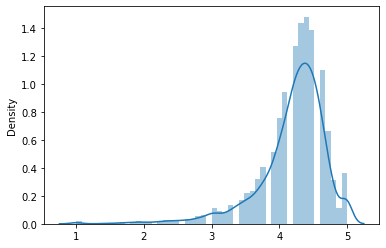

In [18]:
# Checking the distribution of Rating Column

sns.distplot(x=gps["Rating"])
plt.show()

As It is seen, Ratings vary from 0 to 5.

Eventhough data seemes to be left skewed, Ideally we cannot drop the data based on IQR method as these pattern of ratings are the nature of its own kind. Therefore, we can consider mean/median value of ratings for null value imputation. 

In [19]:
# Computing mean & median value of ratings

print("The mean value of Rating is:",gps["Rating"].mean())
print("The meduan value of Rating is:",gps["Rating"].median())

# Since mean and median is almost similar, anyone can be considered. In this case mean is considered

rating_mean = gps["Rating"].mean()

# Imputing rating_mean for all the null values 

gps["Rating"] = gps["Rating"].fillna(rating_mean)

# Checking for null values

print("Total Null values in Rating column is:", gps["Rating"].isnull().sum())

The mean value of Rating is: 4.191757420456978
The meduan value of Rating is: 4.3
Total Null values in Rating column is: 0


#### Size Feature

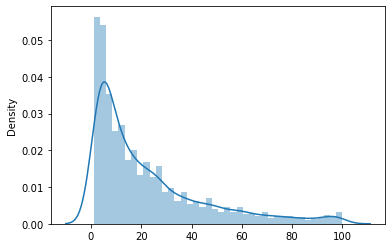

In [20]:
# Checking the distribution of Rating Column

sns.distplot(x=gps["Size"])
plt.show()

Above plot shows that the data is right skewed. 

Approaching stakeholders for missing values might be the right thing to do in this case as there is no min and max limit for sizes and also size of the app may influence the number of downloads. 

However, for the current scenario I have considered to impute null values with the mean value

In [21]:
# Computing mean value of Size

print("The mean value of Size is:",gps["Size"].mean())

# Storing mean value in a vaariable

mean_size = gps["Size"].mean()

# Imputing missing values with mean_size

gps["Size"] = gps["Size"].fillna(mean_size)

# Checking for null values

print("Total Null values in Size column is:", gps["Size"].isnull().sum())

The mean value of Size is: 22.270540265035574
Total Null values in Size column is: 0


#### Type Feature

In [22]:
# loacating Null Value record

gps.loc[gps["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.191757,0.0,22.27054,0,NaN,0.0,Everyone,Strategy,28-Jun-18,Varies with device,Varies with device


There is only one such record. This can be imputed as "Free" since the price of the app corresponding to this record is zero

In [23]:
# Imputation of null value

gps["Type"] = gps["Type"].fillna("Free")

#### Current Ver Feature

In [24]:
# loacating Null Value records

gps.loc[gps["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55.0,2.70000,5000,Free,0.0,Everyone,Art & Design,6-Jun-18,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145.0,22.27054,1000000,Free,0.0,Everyone,Libraries & Demo,12-Feb-13,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010.0,8.70000,500000,Free,0.0,Everyone,Tools,10-May-17,NaN,4.0 and up
6803,BT Master,FAMILY,4.191757,0.0,22.27054,100,Free,0.0,Everyone,Education,6-Nov-16,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179.0,14.00000,50000,Paid,99.0,Everyone,Puzzle,18-Apr-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.191757,44.0,7.20000,10000,Free,0.0,Everyone,Entertainment,3-Apr-17,NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.191757,1.0,22.27054,10,Paid,99.0,Everyone,Tools,4-Jul-16,NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.191757,8.0,22.27054,1000,Free,0.0,Everyone,Books & Reference,31-Jan-17,NaN,3.0 and up


Since "Current Ver" is a categorical variable. We shall impute the null values with mode

In [25]:
# Computing mean value of Current Ver

print("The mode value of Current ver is:",gps["Current Ver"].mode())

# Storing the value in a variable

current_ver_mode = "Varies with device"

# Imputing null values with current_ver_mode

gps["Current Ver"] = gps["Current Ver"].fillna(current_ver_mode)

# Checking for null values

print("Total Null values in Current Ver column is:", gps["Current Ver"].isnull().sum())

The mode value of Current ver is: 0    Varies with device
Name: Current Ver, dtype: object
Total Null values in Current Ver column is: 0


#### Android Ver Feature

In [26]:
# Locating Null Values

gps.loc[gps["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11.0,1000,Paid,149.0,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1,10000,Free,0.0,Everyone,Personalization,27-Mar-18,1.1,NaN


In [27]:
# Computing mean value of Android Ver

print("The mode value of Android ver is:",gps["Android Ver"].mode())

# Storing the value in a variable

android_ver_mode = "4.1 and up"

# Imputing null values with android_ver_mode

gps["Android Ver"] = gps["Android Ver"].fillna(android_ver_mode)

# Checking for null values

print("Total Null values in Android Ver column is:", gps["Android Ver"].isnull().sum())


The mode value of Android ver is: 0    4.1 and up
Name: Android Ver, dtype: object
Total Null values in Android Ver column is: 0


In [28]:
gps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Encoding Categorical Features 

Encoding helps to convert the string elements in to a integer as model cannot be trained on string elements

In [29]:
# Type & Content Rating Feature

gps.replace({"Type" : {"Free":0, "Paid":1},
             "Content Rating" : {"Everyone" : 0, "Adults" : 1}}, inplace = True)

In [30]:
# Encoding Category 

category_uni = gps["Category"].unique()
len_cate_uni = len(category_uni)
category_dict = {}
for i in range(len_cate_uni):
    category_dict[category_uni[i]] = i
gps["Category_new"] = gps["Category"].map(category_dict).astype(int)

In [31]:
# Encoding Genres

genres_uni = gps["Genres"].unique()
len_genres_uni = len(genres_uni)
genres_dict = {}
for i in range(len_genres_uni):
    genres_dict[genres_uni[i]] = i
gps["Genres_new"] = gps["Genres"].map(genres_dict).astype(int)

In [32]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int32  
 6   Type            10840 non-null  int64  
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  int64  
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
 13  Category_new    10840 non-null  int32  
 14  Genres_new      10840 non-null  int32  
dtypes: float64(4), int32(3), int64(2), object(6)
memory usage: 1.2+ MB


In [33]:
gps.loc[gps["Installs"]== gps["Installs"].max()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_new,Genres_new
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,22.27054,1000000000,0,0.0,1,Books & Reference,3-Aug-18,Varies with device,Varies with device,3,6
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,22.27054,1000000000,0,0.0,0,Communication,1-Aug-18,Varies with device,Varies with device,6,10
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,22.27054,1000000000,0,0.0,0,Communication,3-Aug-18,Varies with device,Varies with device,6,10
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,22.27054,1000000000,0,0.0,0,Communication,1-Aug-18,Varies with device,Varies with device,6,10
340,Gmail,COMMUNICATION,4.3,4604324.0,22.27054,1000000000,0,0.0,0,Communication,2-Aug-18,Varies with device,Varies with device,6,10
341,Hangouts,COMMUNICATION,4.0,3419249.0,22.27054,1000000000,0,0.0,0,Communication,21-Jul-18,Varies with device,Varies with device,6,10
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,22.27054,1000000000,0,0.0,0,Communication,3-Aug-18,Varies with device,Varies with device,6,10
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,22.27054,1000000000,0,0.0,0,Communication,1-Aug-18,Varies with device,Varies with device,6,10
386,Hangouts,COMMUNICATION,4.0,3419433.0,22.27054,1000000000,0,0.0,0,Communication,21-Jul-18,Varies with device,Varies with device,6,10
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,22.27054,1000000000,0,0.0,0,Communication,3-Aug-18,Varies with device,Varies with device,6,10


## Visualizations

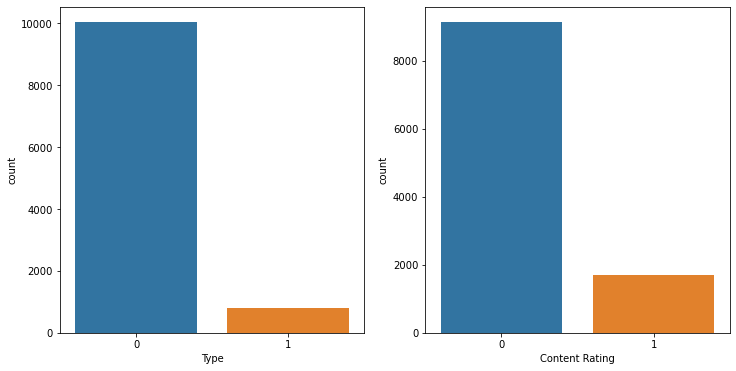

In [34]:
# Plots for Categorical Variables 

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.countplot(data= gps, x= "Type", ax = ax[0])
sns.countplot(data = gps, x = "Content Rating", ax = ax[1])
plt.show()

Type:
As we have encoded 0 as "Free" and 1 as "paid", we can conclude that there are higher chances of app being free than paid

Content Rating:
As we have encoded 0 as "Everyone" and 1 as "Adults", we can conclude that there are minor count of adult apps

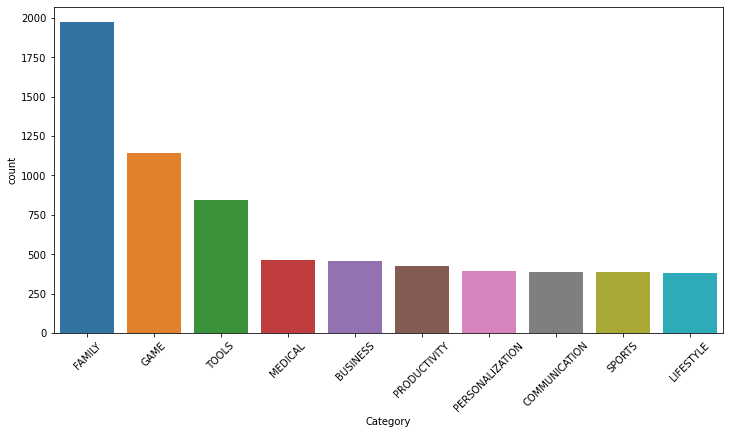

In [35]:
# Top 10 app downloads categories 

plt.figure(figsize = (12,6))
sns.countplot(data = gps, x = "Category", order = gps["Category"].value_counts().iloc[:10].index)
plt.xticks(rotation = 45)
plt.show()

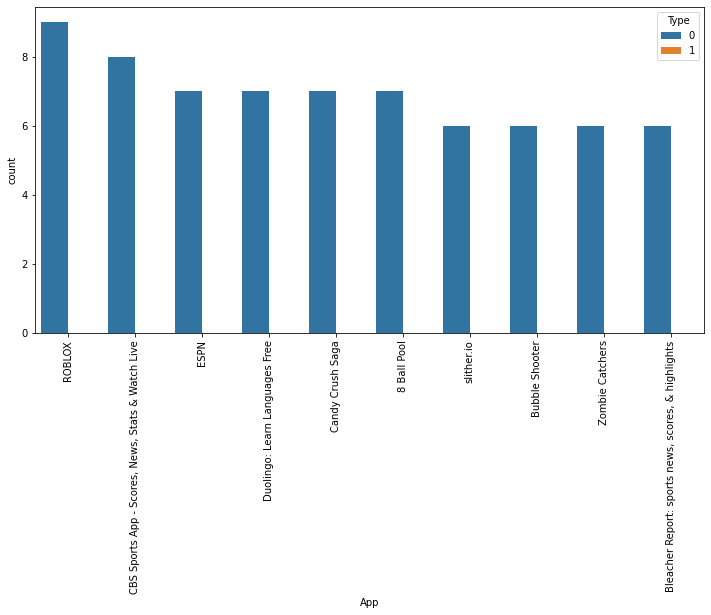

In [36]:
# Top 10 Apps

plt.figure(figsize= (12,6))
sns.countplot(data = gps, x = "App", hue = "Type", order = gps["App"].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

All top 10 apps are freely available ones and not paid 

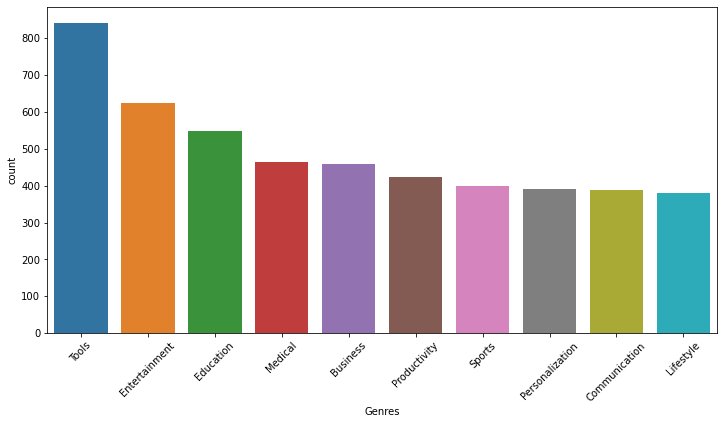

In [37]:
# Top 10 Genres

plt.figure(figsize=(12,6))
sns.countplot(data = gps, x = "Genres", order = gps["Genres"].value_counts().iloc[:10].index)
plt.xticks(rotation = 45)
plt.show()

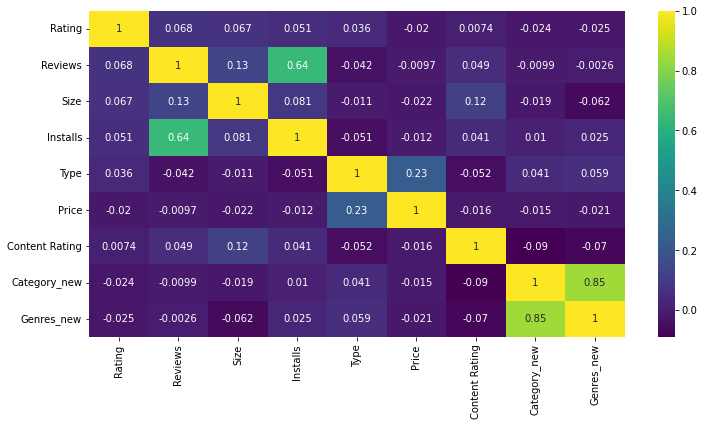

In [38]:
# Checking corelation between variables

plt.figure(figsize=(12,6))
correlation = gps.corr().round(4)
sns.heatmap(correlation, annot = True, cmap = "viridis")
plt.show()

As indicated above, most of the features are not strongly correlated to each other.

For features category & Generes the correlation score is 0.85, suggests they are highly correlated. Therefore we can drop any on these two moving forward

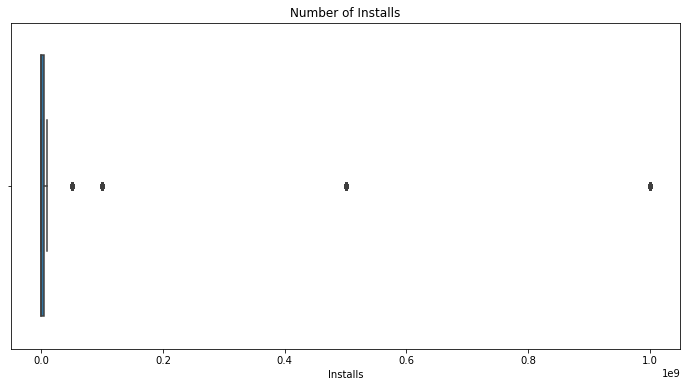

In [39]:
# Box plot for number of installs

plt.figure(figsize=(12,6))
sns.boxplot(x = gps["Installs"])
plt.title("Number of Installs")
plt.show()

Eventhough above box plots show some outliers, we cannot drop these records due to the nature of the data, as number of installs can be any number depending upon the app. 

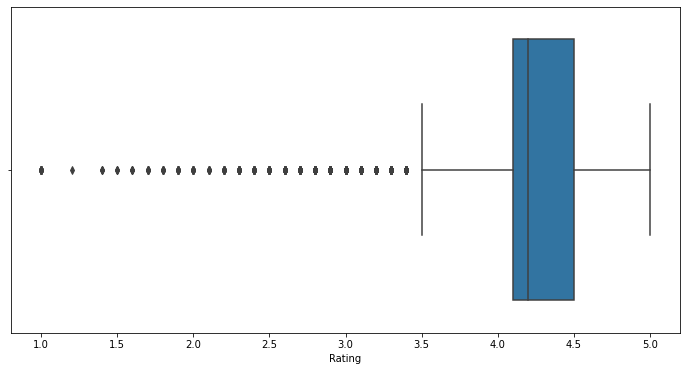

In [40]:
# Box plot for number of installs

plt.figure(figsize=(12,6))
sns.boxplot(x = gps["Rating"])
plt.show()

Eventhough above box plots show some outliers towards left, we cannot drop these records due to the nature of the data, as user rating can be vary depending upon the app performance. 

## Data Preprocessing

In [41]:
# Overview of all features

gps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Category_new', 'Genres_new'],
      dtype='object')

Features namely "Android Ver", "Current Ver", "App" & "Last Updated" seems not important, so these columns shall be dropped

Fearutes "Category" & "Generes" shall also be dropped since "Category_new" & "Generes_new" has been created

In [42]:
# Dropping unimportant and correlated features

gps_final = gps.drop(columns= ['App','Category','Genres','Last Updated','Current Ver','Android Ver','Genres_new'], axis = 1)

In [43]:
gps_final.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Category_new
0,4.1,159.0,19.0,10000,0,0.0,0,0
1,3.9,967.0,14.0,500000,0,0.0,0,0
2,4.7,87510.0,8.7,5000000,0,0.0,0,0
3,4.5,215644.0,25.0,50000000,0,0.0,1,0
4,4.3,967.0,2.8,100000,0,0.0,0,0


In [44]:
gps_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          10840 non-null  float64
 1   Reviews         10840 non-null  float64
 2   Size            10840 non-null  float64
 3   Installs        10840 non-null  int32  
 4   Type            10840 non-null  int64  
 5   Price           10840 non-null  float64
 6   Content Rating  10840 non-null  int64  
 7   Category_new    10840 non-null  int32  
dtypes: float64(4), int32(2), int64(2)
memory usage: 677.5 KB


In [45]:
# Train Test Split

X = gps_final.drop("Installs", axis = 1)
y = gps_final["Installs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 3)

X_train.shape, X_test.shape

((8672, 7), (2168, 7))

### Scaling - Standard Scaler

In [46]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
# Convert Scaled data in to dataframe

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

X_train_scaled

,Rating,Reviews,Size,Type,Price,Content Rating,Category_new
0,0.016995,-0.151188,0.144014,-0.282755,-0.065663,-0.434089,-0.225891
1,-0.000170,-0.151197,-0.714244,-0.282755,-0.065663,2.303673,-0.092422
2,-1.440734,-0.151165,-0.546538,-0.282755,-0.065663,-0.434089,-0.893236
3,-0.815993,-0.151157,-0.250587,-0.282755,-0.065663,-0.434089,0.041047
4,0.433489,0.023810,0.538615,-0.282755,-0.065663,2.303673,-0.092422
...,...,...,...,...,...,...,...
8667,-0.399499,-0.149810,0.390640,-0.282755,-0.065663,-0.434089,-0.225891
8668,-0.191252,-0.095722,-0.151937,-0.282755,-0.065663,-0.434089,-0.092422
8669,1.058231,-0.086675,0.538615,-0.282755,-0.065663,-0.434089,0.841861
8670,0.225242,0.282759,2.758247,-0.282755,-0.065663,-0.434089,-0.092422


As evident from above, 
Scaling reduces the scale of the datpoints to be within 0 & 1, this can reduce the computation time in distance based algorithms 

# Model Building

## Model 1 - Linear Regression

In [48]:
#Assigning Linear regression to a variable

model1 = LinearRegression()

In [49]:
# Training the model

model1.fit(X_train_scaled, y_train)

LinearRegression()

In [50]:
# Predicting the test dataset

y_pred1 = model1.predict(X_test_scaled)

In [51]:
print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_pred1))
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred1))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test, y_pred1)))
print("R2 Score:",r2_score(y_test, y_pred1)*100)

Mean Absolute Error (MAE): 13577889.066423398
Mean Squared Error (MSE): 3571208564100098.0
Root Mean Squared Error (RMSE): 59759589.724998094
R2 Score: 35.35658548822648


## Model 2 - KNN

In [52]:
# Assigning KNN to variable

model2 = KNeighborsRegressor()

In [53]:
# Model Training

model2.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [54]:
# Model Prediction

y_pred2 = model2.predict(X_test_scaled)

In [55]:
# Evaluation of Model 2

print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_pred2))
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred2))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test, y_pred2)))
print("R2 Score:",r2_score(y_test, y_pred2)*100)

Mean Absolute Error (MAE): 7403760.259409594
Mean Squared Error (MSE): 2212719031157191.2
Root Mean Squared Error (RMSE): 47039547.522879
R2 Score: 59.94697286316908


### Hyperparameter Tuning By Error Method to Determine K Nearest Neighbours

In [56]:
error_rate = []

for i in range (1,21):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

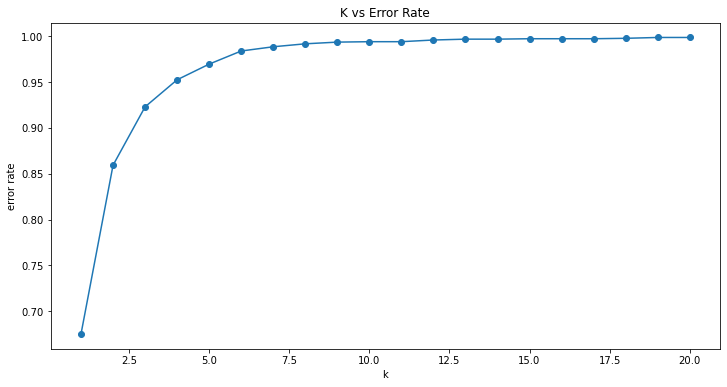

In [57]:
# Plotting different K values

plt.figure(figsize=(12,6))
plt.plot(range(1,21), error_rate,  marker = "o")
plt.xlabel("k")
plt.ylabel("error rate")
plt.title("K vs Error Rate")
plt.show()

Above graph indicates sharp turn or elbow at k = 3 or 4
Lets consider K = 3 and fit our model for better accuracy

In [58]:
modelh2 = KNeighborsRegressor(n_neighbors=3)  

In [59]:
# Model Training

modelh2.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [60]:
# Model Prediction

y_predh2 = modelh2.predict(X_test_scaled)

In [61]:
# Evaluation of Model 2 Hyperparameter Tuned

print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_predh2))
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_predh2))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test, y_predh2)))
print("R2 Score:",r2_score(y_test, y_predh2)*100)

Mean Absolute Error (MAE): 5400064.795817957
Mean Squared Error (MSE): 1774705006115697.8
Root Mean Squared Error (RMSE): 42127247.78709971
R2 Score: 67.8755834930169


After Hyperparameter Tuning the r2 score for the model increased from 59% to 67%. Eventhough there is improvement, the model accuracy or r2 score is not good 

## Model 3 - Random Forest Regressor

In [62]:
# Assigning Model to variable

model3 = RandomForestRegressor(criterion = "friedman_mse",
                               random_state=3, 
                               n_estimators = 200, 
                               max_depth= 64)

In [63]:
# Model Training

model3.fit(X_train_scaled, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=64, n_estimators=200,
                      random_state=3)

In [64]:
# Model Prediction

y_pred3 = model3.predict(X_test_scaled)

In [65]:
# Evaluation of Model 3

print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_pred3))
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred3))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test, y_pred3)))
print("R2 Score:",r2_score(y_test, y_pred3)*100)

Mean Absolute Error (MAE): 4883962.783985223
Mean Squared Error (MSE): 1481818670762180.5
Root Mean Squared Error (RMSE): 38494397.91401056
R2 Score: 73.17719846208344


### Hyperparameter Tuning 

In [66]:
# Defining parameters for tuning

parameters_3 =  {"n_estimators" : [20,25,30],
                "criterion" : ["squared_error", "absolute_error"], 
                "max_depth" :[1,2,3,4,5,6,7,8,9,10],
               "min_samples_split" : [2,3,4,5,6,7,8,9,10,12,14]}

In [67]:
gs_cv_3 = GridSearchCV(model3, parameters_3, scoring="r2", error_score="raise")

In [68]:
# # Model fitting for tuning

# gs_cv_3.fit(X_train_scaled, y_train)

Hyperparameter tuning is taking more than 2 hours. Therefore I have commented it out

## Model 4 - Adaboost Regressor

In [69]:
# Assigning model to Variable

model4 = AdaBoostRegressor(random_state= 12, n_estimators= 300, learning_rate= 0.01)

In [70]:
# Model Training

model4.fit(X_train_scaled, y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=300, random_state=12)

In [71]:
# Model Prection

y_pred4 = model4.predict(X_test_scaled)

In [72]:
# Evaluation of Model 4

print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_pred4))
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred4))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test, y_pred4)))
print("R2 Score:",r2_score(y_test, y_pred4)*100)

Mean Absolute Error (MAE): 11883259.401994959
Mean Squared Error (MSE): 2164395244015882.0
Root Mean Squared Error (RMSE): 46523061.42136265
R2 Score: 60.821694836664776


## Model 5 - XG Boost Regressor

In [73]:
# Assigning model to variable

model5 = xgb.XGBRegressor(max_depth = 36, 
                          learning_rate = 0.01, 
                          n_estimators = 1000, 
                          random_state = 32, 
                          eval_metric = "rmse")

In [74]:
# Model Training

model5.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=36, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=32, ...)

In [75]:
# Model Prediction

y_pred5 = model5.predict(X_test_scaled)

In [76]:
# Evaluation of Model 5

print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_pred5))
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred5))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test, y_pred5)))
print("R2 Score:",r2_score(y_test, y_pred5)*100)

Mean Absolute Error (MAE): 4598182.645386288
Mean Squared Error (MSE): 1578405152997238.5
Root Mean Squared Error (RMSE): 39729147.3983175
R2 Score: 71.42886035880936


#### Significance of Evaluation Metrics

Mean Absoulte Error --- 
    This indicates the error between average of predicted value and the average of actual values
    
    
Mean Squared Error ---
    It is the average of the sum of all the squared distances between predicted and the actual values
    
    
Root Mean Squared Error ---
        RMSE can be interpreted as the average error that the model’s predictions have in comparison with the actual, with  extra weight added to larger prediction errors.
        
        
R2 Score ---
    R Squared measures how much of the dependent variable variation is explained by the independent variables in the model.

In [77]:
# Sample Installs predictions of Random Forest Regressor - Model 3

predicted = pd.DataFrame(y_pred3).astype(int)
predicted.rename(columns = {0:"Installs Predicted"}, inplace = True)
predicted.head(15)

,Installs Predicted
0,234850
1,50000
2,9547
3,4697
4,233550000
5,98850000
6,18775000
7,9115000
8,1478500
9,1562


## Conclusion

Looking at the various models above, Random Forest Regressor performs better with R2 score of 72 % approx. Eventhough the score is not acceptable, this model is beat than the rest.

On performing hyperparameter tuning, evalvation metrics might improve, due to the high time consumption, hyperparameter tuning cells are commented out for this model



# Business Scope

The above machine learning model will help the stakeholders of a business to decide on what type of app can be developed for obtaining Maximum number of installs


Furthermore, the stakeholders can predit the approximate number of app installs based on various independent variables such as category, type, size of the app, content rating, reviews, etc.
